In [2]:
# Importanting all the necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import calendar

In [3]:
df = pd.read_csv(r"C:\Users\dhung\Documents\jupyer\cab_rides.csv")

# Converting the epoch (unix time) to normal date and time 
df['time_stamp']=pd.to_datetime(df['time_stamp'],unit='ms')
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,2018-12-16 09:30:07.890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,2018-11-27 02:00:23.677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,2018-11-28 01:00:22.198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,2018-11-30 04:53:02.749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,2018-11-29 03:49:20.223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
# Checking the data types of each column
df.dtypes

distance                   float64
cab_type                    object
time_stamp          datetime64[ns]
destination                 object
source                      object
price                      float64
surge_multiplier           float64
id                          object
product_id                  object
name                        object
dtype: object

In [7]:
# Droping the rows with null column(s) because we have enough data to make accurate observations. 
df = df.dropna()

In [8]:
# Accessing the year, month, day, hour, minute, second and weekday data from the column, storing them 
# in their own columns

df['Years'] =  df.time_stamp.dt.year
df['Month'] =  df.time_stamp.dt.month
df['Day'] =  df.time_stamp.dt.day
df['Hour'] =  df.time_stamp.dt.hour
df['Minute'] =  df.time_stamp.dt.minute
df['Second'] =  df.time_stamp.dt.second
df['Weekday'] =  df.time_stamp.dt.day_name()

# Chaninging the data types 
df.cab_type = df['cab_type'].astype('category')
df.product_id = df['product_id'].astype('category')



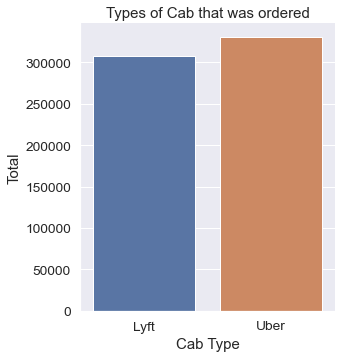

In [170]:
# Checking which cab service is used by most people.
sns.set(font_scale = 1.25)
g = sns.catplot(x='cab_type',data=df,kind='count')
g.set_axis_labels('Cab Type', 'Total')
g.set(title='Types of Cab that was ordered')
plt.show()

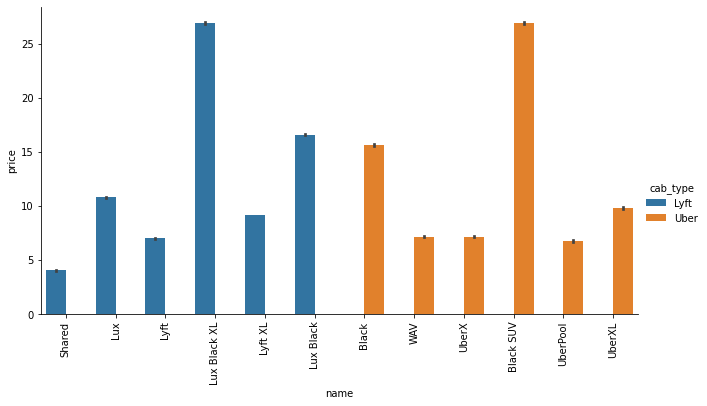

In [9]:
# Checking which source has the most data for visualization
# We found out the table has more data for the rides from Haymnarket to North Station. 
df.source.value_counts()

# Checking the price for each kind of Uber and Lyft rides and how they compare to each other.
# We see that Price for Lyft Lux Black Xl and Uber Black SUV are the highest compared to other kind
# and the price for Lyft Shared and UberPool are the least. 
cond= ((df['source']=='Haymarket Square') & (df['destination']=='North Station'))
df1 = df[['source','destination','price','Years','Month','Day','Hour','Minute','Second','Weekday','name','cab_type']][cond]
g1=sns.catplot(x='name',y='price',data=df1,kind='bar', aspect=(15/8.27),hue='cab_type')
g1.set_xticklabels(rotation=90)
plt.show()

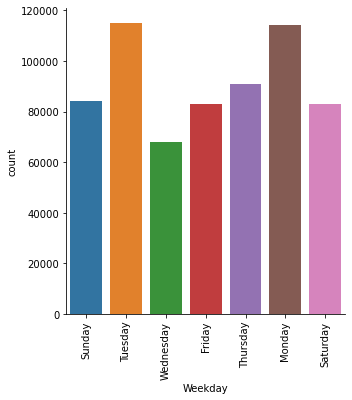

In [10]:
# Observing the week days where most rides are taken.
# We see that the rides are mostly booked on Tuesdays and Mondays while they are least booked on Wednesdays.
g2=sns.catplot(x='Weekday',kind='count',data=df)
g2.set_xticklabels(rotation=90)
plt.show()

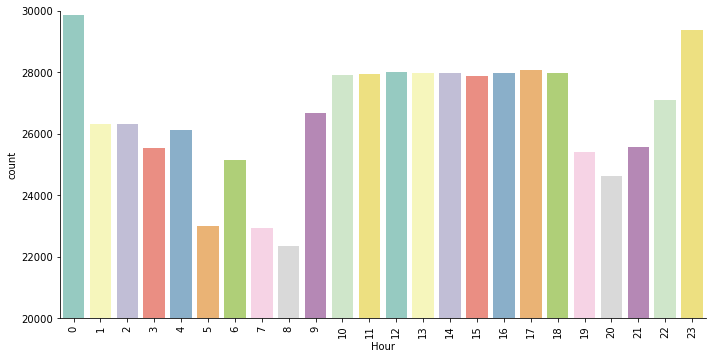

In [11]:
# Observing the number of rides at different times of a day. 
# We see that the rides are mostly booked at 12am and 11pm while they are least booked at 5am, 7am and 8am.
g2=sns.catplot(x='Hour',kind='count',data=df,aspect=(20/10),palette='Set3')
g2.set_xticklabels(rotation=90)
g2.set(ylim=(20000, 30000))
plt.show()

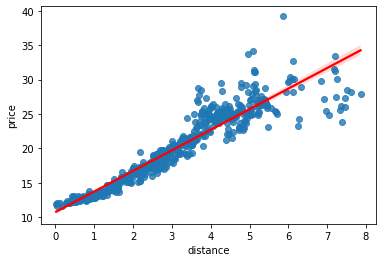

In [12]:
# Checking the relationship between travel distance and price.
distance= df.groupby('distance')['price'].mean()
sns.regplot(x=distance.index,y=distance,scatter=True,line_kws={'color':'red'})
plt.show()

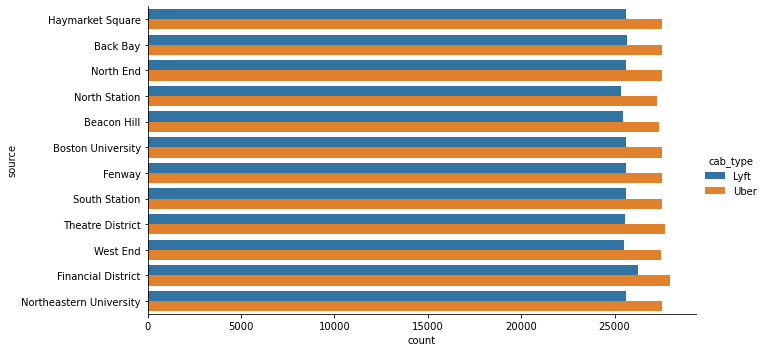

In [13]:
# Checking which type of cab is mostly used at each locations of Boston
# We see that Uber is used more than Lyft at each locations of Boston
g3= sns.catplot(y='source',data=df,kind='count',hue='cab_type',aspect=(20/10))
plt.show()